# TOPIC MODELLING

## DATA IMPORT AND PREVIEW

In [3]:
# Importing pandas library, reading a CSV file, and displaying the first 20 rows

import pandas as pd
file = "C:/Users/abhil/OneDrive/Desktop/Text Based Analysis/un-general-debates-blueprint.csv"
df = pd.read_csv(file)
df.head(20)

session  year country                     country_name  \
0        25  1970     ALB                          Albania   
1        25  1970     ARG                        Argentina   
2        25  1970     AUS                        Australia   
3        25  1970     AUT                          Austria   
4        25  1970     BEL                          Belgium   
5        25  1970     BLR                          Belarus   
6        25  1970     BOL  Bolivia, Plurinational State of   
7        25  1970     BRA                           Brazil   
8        25  1970     CAN                           Canada   
9        25  1970     CMR                         Cameroon   
10       25  1970     COG                            Congo   
11       25  1970     COL                         Colombia   
12       25  1970     CRI                       Costa Rica   
13       25  1970     CUB                             Cuba   
14       25  1970     DOM               Dominican Republic   
15       25  1970     DZA                          Algeria   
16       25  1970     ECU                          Ecuador   
17       25  1970     FRA                           France   
18       25  1970     GBR                   United Kingdom   
19       25  1970     GHA                            Ghana   

                  speaker    position  \
0                 Mr. NAS         NaN   
1      Mr. DE PABLO PARDO         NaN   
2             Mr. McMAHON         NaN   
3      Mr. KIRCHSCHLAEGER         NaN   
4              Mr. HARMEL         NaN   
5          Mr. GURINOVICH         NaN   
6      Mr. CAMACHO OMISTE         NaN   
7      Mr. GIBSON BARBOZA         NaN   
8               Mr. SHARP         NaN   
9              Mr. AHIDJO  President    
10            Mr. ICKONGA         NaN   
11  Mr. VASQUEZ CARRIZOSA         NaN   
12              Mr. FACIO         NaN   
13            Mr. ALARCON         NaN   
14        Mr FERNANDEZ G.               
15              Mr. YAZID         NaN   
16            Mr. Benites         NaN   
17           Mr. SCHUMANN         NaN   
18   Sir Alec DOUGLASHOME         NaN   
19              Mr. OWUSU         NaN   

                                                 text  
0   33: May I first convey to our President the co...  
1   177.\t : It is a fortunate coincidence that pr...  
2   100.\t  It is a pleasure for me to extend to y...  
3   155.\t  May I begin by expressing to Ambassado...  
4   176. No doubt each of us, before coming up to ...  
5   \n71.\t. We are today mourning the untimely de...  
6   135.\t  I wish to congratulate the President o...  
7   1.\tMr. President, I should like, first of all...  
8   \nThe General Assembly is fortunate indeed to ...  
9   : A year ago I came here as the Acting Preside...  
10  122.\t  I cannot begin my intervention without...  
11  Mr. President, this visit to the United Nation...  
12  62.\t  Mr. President, your election to the Pre...  
13  1.\t  Mr. President, I should first like to co...  
14  \n\n\n Mr. President, it was a source of great...  
15  1.  The delegation of Algeria is very pleased ...  
16  71.  It had been my hope that a loftier person...  
17  84.\t  Within one month, when we celebrate the...  
18  110.\t Mr. President, I should like first to s...  
19  121.\t I should like to begin by congratulatin...

## PRINTING TEXT PREVIEW

In [4]:
# Printing the first 400 characters of the text column for specific rows using iloc

print(repr(df.iloc[2666]["text"][0:400]))
print(repr(df.iloc[4726]["text"][0:400]))

'\ufeffIt is indeed a pleasure for me and the members of my delegation to extend to Ambassador Garba our sincere congratulations on his election to the presidency of the forty-fourth session of the General Assembly. His election to this high office is a well-deserved tribute to his personal qualities and experience. I am fully confident that under his able and wise leadership the Assembly will further c'
'\ufeffI wish to join\nother representatives in congratulating you, Sir, on\nyour unanimous election as President of the fifty-sixth\nsession of the General Assembly. We are confident that\n27\n\nunder your able guidance the work of this General\nAssembly session will be another milestone on the new\ninternational scene, particularly in confronting the new\nchallenges facing our world, especially after the\nextre'


## TEXT PREPROCESSING

In [6]:
# Importing re module, splitting 'text' column into paragraphs, and counting number of paragraphs in each row

import re
df["paragraphs"] = df["text"].map(lambda text: re.split('\\.\\s*\\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

## TF-IDF VECTORIZATION

In [7]:
# Creating a TF-IDF vectorizer with specified parameters and transforming the text data

import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

# Use the list of stop words with the TfidfVectorizer
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['text'])
print(tfidf_text_vectors.shape)

C:\Users\abhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(7507, 24611)


## DATAFRAME CREATION

In [8]:
# Creating a DataFrame 'paragraph_df' from the 'paragraphs' column of the original DataFrame 'df', 
# associating each paragraph with its corresponding year

paragraph_df = pd.DataFrame([{ "text": paragraph, "year": year } 
                               for paragraphs, year in zip(df["paragraphs"], df["year"]) 
                                    for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

text  year
0  33: May I first convey to our President the co...  1970
1  35.\tThe utilization of the United Nations to ...  1970
2  36.\tThe whole of progressive mankind recalls ...  1970
3  37.\tAll this has had well known consequences ...  1970
4  38.\tOne of the undeniable proofs that the Uni...  1970
5  39.\tUndoubtedly, such a state of affairs in t...  1970
6  40.\tThe liberation movement at the world leve...  1970
7  41.\tPanic-stricken at the impetuous growth of...  1970
8  42.\tAlthough split by numerous contradictions...  1970
9  43.\tIn that connexion we can cite, simultaneo...  1970

## TF-IDF VECTORIZATION FOR PARAGRAPHS

In [9]:
# Creating a TF-IDF vectorizer for paragraphs with specified parameters and transforming the text data

tfidf_para_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["text"])
print(tfidf_para_vectors.shape)

(279076, 25156)


## NMF MODEL FITTING FOR TEXT DATA

In [10]:
# Creating an NMF model with 10 components and fitting it to TF-IDF vectors of text data, then obtaining the factorized matrices

from sklearn.decomposition import NMF

nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

C:\Users\abhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


## TOPIC DISPLAY FUNCTION DEFINITION

In [11]:
# Defining a function to display the top words for each topic based on the NMF model components and feature names

def display_topics(model, feature_names, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (feature_names[largest[i]], abs(words[largest[i]]*100.0/total)))

# Assuming tfidf_para_vectorizer is your TfidfVectorizer and is already fitted
feature_names = tfidf_para_vectorizer.get_feature_names_out()

# Call the function with the NMF model and the feature names
display_topics(nmf_text_model, feature_names)


Topic 00
  classed (0.79)
  nots (0.65)
  die (0.36)
  naturally (0.34)
  recessive (0.25)

Topic 01
  sure (0.38)
  celsius (0.32)
  strategists (0.30)
  maximum (0.29)
  raúl (0.28)

Topic 02
  afflicts (1.15)
  affluence (0.82)
  showcased (0.63)
  mongols (0.36)
  dedicated (0.30)

Topic 03
  appreciation (1.02)
  intimated (0.89)
  order (0.60)
  koevoet (0.54)
  intimately (0.54)

Topic 04
  amazingly (0.33)
  amazing (0.31)
  khmer (0.31)
  organ (0.21)
  bloodbath (0.21)

Topic 05
  opposites (1.55)
  intervened (1.23)
  shifa (0.86)
  interval (0.82)
  fatalities (0.71)

Topic 06
  shrinkage (0.81)
  regiment (0.78)
  naturally (0.68)
  unmiss (0.64)
  shark (0.63)

Topic 07
  grabbing (4.26)
  enlightenment (1.75)
  biases (1.53)
  organize (1.47)
  regiment (0.57)

Topic 08
  equidistant (0.61)
  equidistance (0.44)
  continuance (0.39)
  boke (0.34)
  harvard (0.30)

Topic 09
  cancer (0.98)
  sfor (0.66)
  aylan (0.63)
  reverse (0.63)
  balloting (0.61)


## NMF MODEL FITTING FOR PARAGRAPHS

In [12]:
# Creating an NMF model for paragraphs, fitting it to TF-IDF vectors of paragraphs, then displaying the top words for each topic

nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_text_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_text_model.components_
display_topics(nmf_text_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
  international (2.01)
  world (1.50)
  community (0.91)
  new (0.76)
  peace (0.67)

Topic 01
  general (2.88)
  session (2.85)
  assembly (2.83)
  mr (2.00)
  president (1.83)

Topic 02
  countries (4.41)
  developing (2.49)
  economic (1.51)
  developed (1.35)
  trade (0.92)

Topic 03
  nations (5.61)
  united (5.50)
  organization (1.27)
  states (1.03)
  charter (0.93)

Topic 04
  nuclear (4.91)
  weapons (3.25)
  disarmament (2.01)
  treaty (1.70)
  proliferation (1.45)

Topic 05
  rights (6.51)
  human (6.20)
  respect (1.16)
  fundamental (0.86)
  universal (0.83)

Topic 06
  africa (3.80)
  south (3.30)
  african (1.70)
  namibia (1.38)
  apartheid (1.18)

Topic 07
  security (6.08)
  council (5.82)
  permanent (1.48)
  reform (1.47)
  peace (1.31)

Topic 08
  people (1.35)
  peace (1.32)
  east (1.28)
  middle (1.17)
  palestinian (1.15)

Topic 09
  development (4.51)
  sustainable (1.20)
  economic (1.07)
  social (1.00)
  goals (0.94)


## TOPIC CONTRIBUTION CALCULATION

In [13]:
# Calculating the percentage contribution of each topic in the text data

W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([11.06189432, 17.0213082 , 13.6565622 , 10.18695452, 11.35821532,
        5.95003141,  7.90001101,  4.13937503, 11.91132462,  6.81432338])

In [14]:
# Calculating the percentage contribution of each topic in the paragraph data

W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([11.99461472, 10.12384143, 10.13359996, 14.58547101,  6.74889346,
        7.06521386,  8.61823051,  8.23846492, 11.85285437, 10.63881575])

## COUNT VECTORIZATION

In [15]:
# Converts spaCy stop words to a list and initializes a CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert spaCy stop words to a list

stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])
count_para_vectors.shape

C:\Users\abhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(279076, 25162)

## LDA MODEL FITTING

In [16]:
# Fits the LDA model to the count vectors of paragraph data

from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

## TOPIC DISPLAY FUNCTION

In [17]:
# Takes the LDA model (model), the vectorizer used to generate features

def display_topics(model, vectorizer, no_top_words=5):
    feature_names = vectorizer.get_feature_names_out()
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (feature_names[largest[i]], abs(words[largest[i]] * 100.0 / total)))

display_topics(lda_para_model, count_para_vectorizer)


Topic 00
  general (4.46)
  assembly (3.55)
  session (3.09)
  president (2.12)
  mr (1.91)

Topic 01
  world (2.60)
  human (1.17)
  people (0.92)
  peace (0.80)
  nations (0.72)

Topic 02
  nuclear (2.88)
  weapons (2.13)
  disarmament (1.67)
  arms (1.39)
  states (1.23)

Topic 03
  international (2.36)
  security (2.18)
  united (2.02)
  nations (2.01)
  council (1.95)

Topic 04
  countries (4.60)
  economic (2.86)
  developing (2.01)
  development (1.51)
  international (1.46)

Topic 05
  peace (2.13)
  east (1.43)
  middle (1.34)
  people (1.31)
  israel (1.24)

Topic 06
  states (1.77)
  countries (1.45)
  peace (1.23)
  relations (1.22)
  peoples (1.19)

Topic 07
  africa (3.06)
  south (2.04)
  united (1.83)
  nations (1.58)
  african (1.04)

Topic 08
  people (1.80)
  republic (1.50)
  government (1.41)
  united (1.26)
  nations (1.04)

Topic 09
  nations (3.25)
  united (2.91)
  development (2.33)
  international (1.69)
  world (1.13)


## TOPIC DISTRIBUTION CALCULATION

In [18]:
# Calculates the percentage distribution of topics across paragraphs.

W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 8.96413708, 13.1939403 ,  7.04455321, 11.08311812,  9.84055263,
        8.80334442,  8.89408336,  6.94897733,  9.48290182, 15.74439172])

## WORDCLOUD GENERATION

In [19]:
# Generates word clouds for each topic in a given topic model.

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

C:\Users\abhil\AppData\Local\Temp\ipykernel_16252\4081123732.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## WORDCLOUD GENERATION

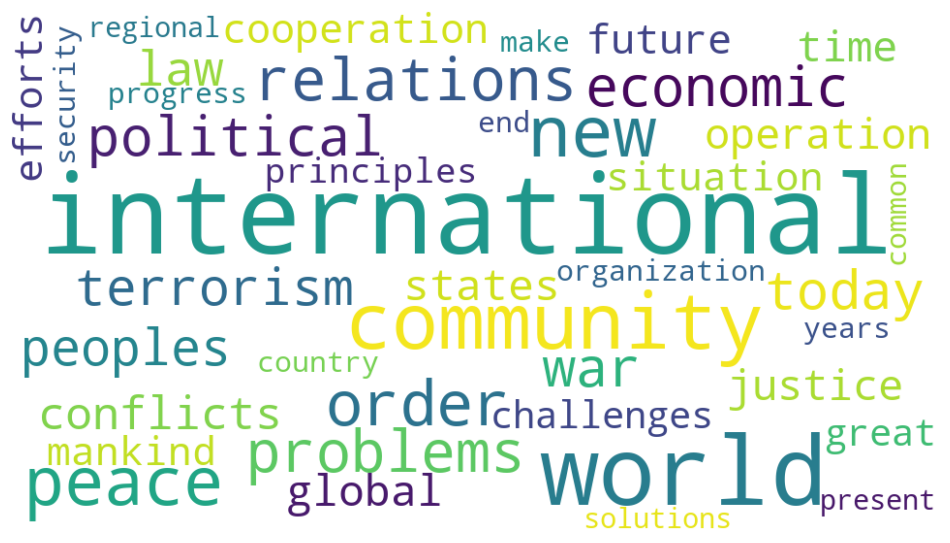

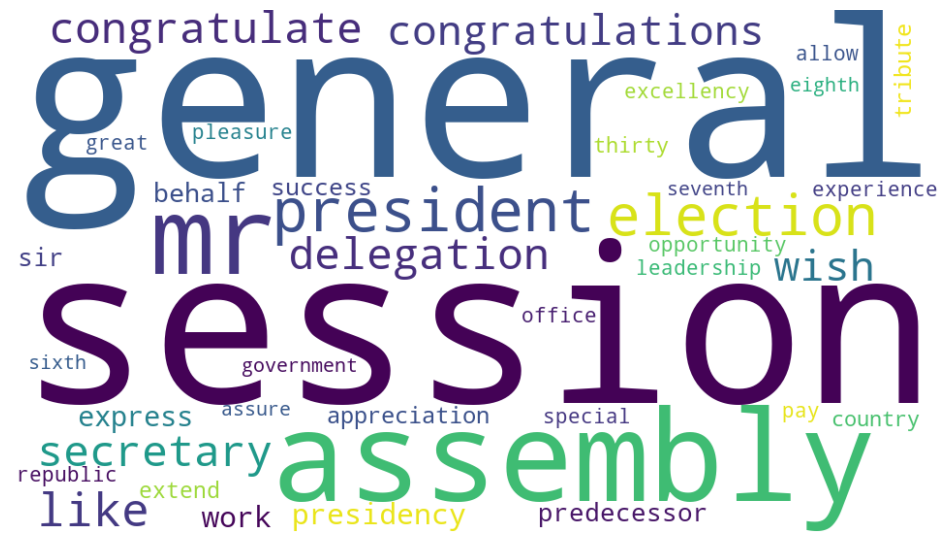

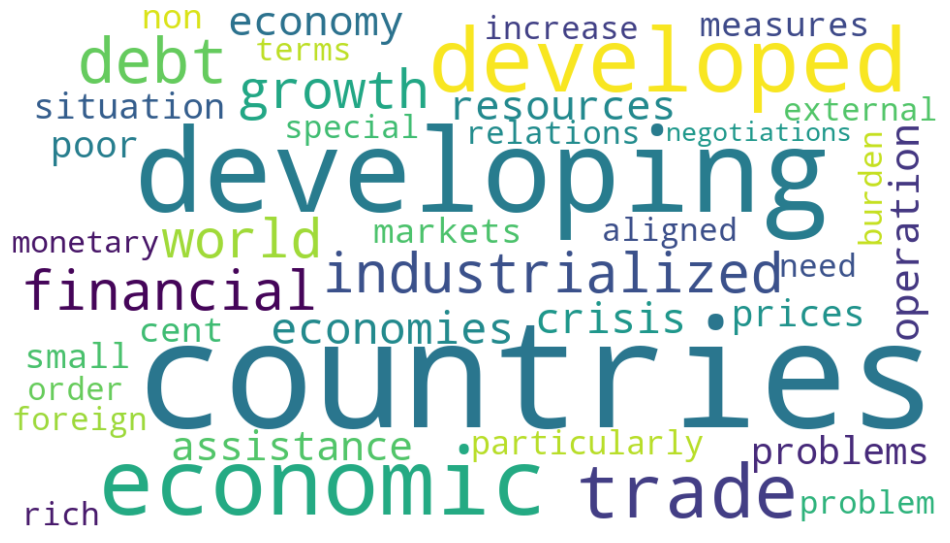

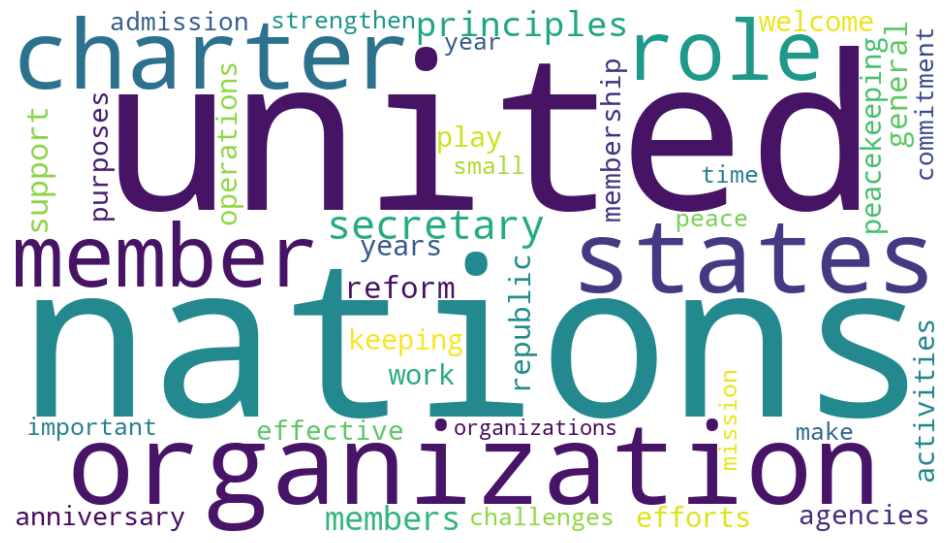

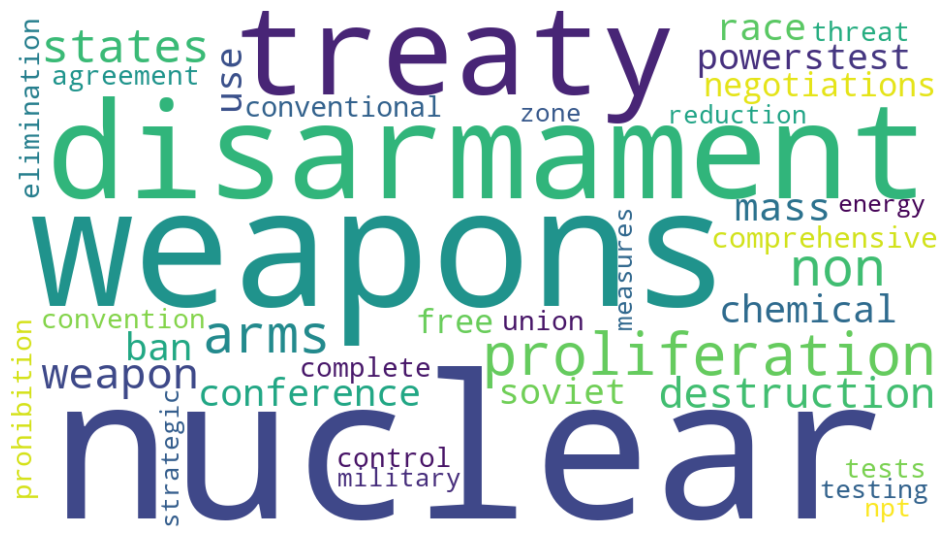

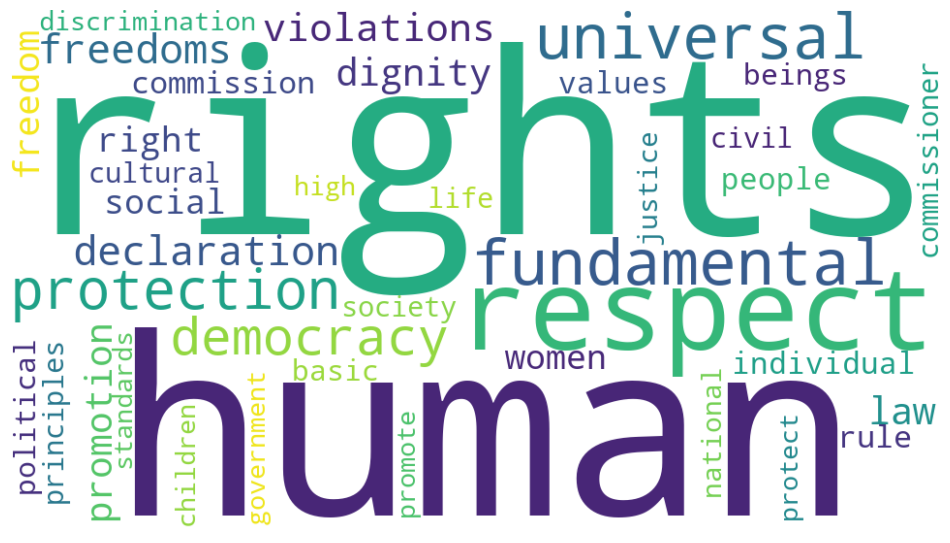

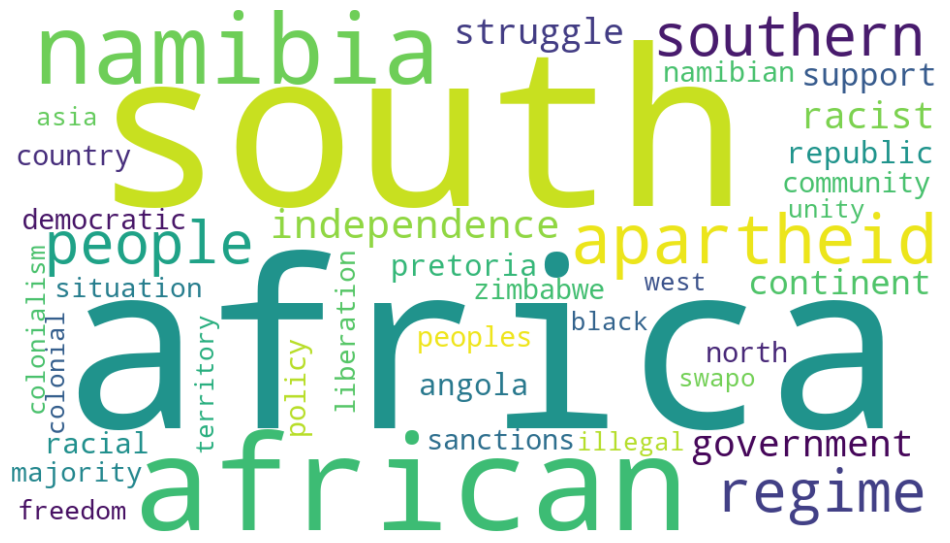

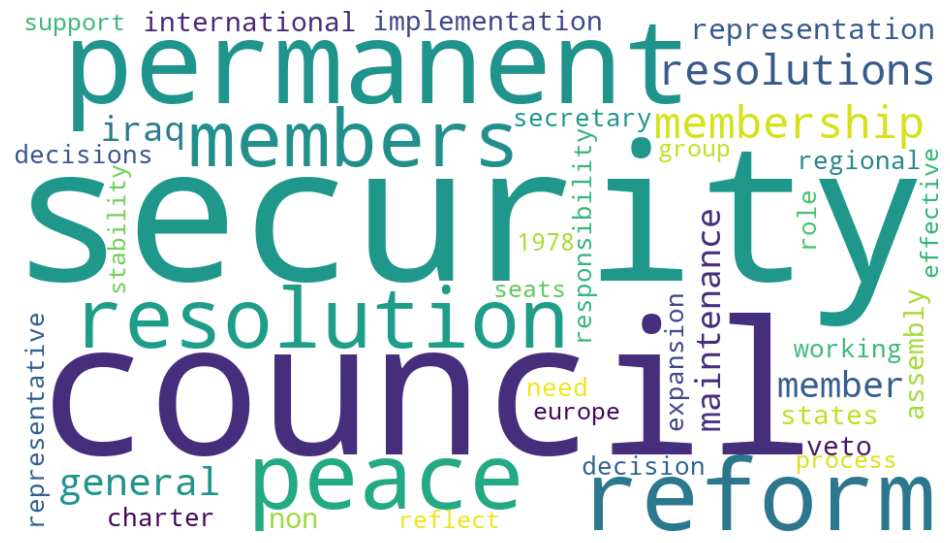

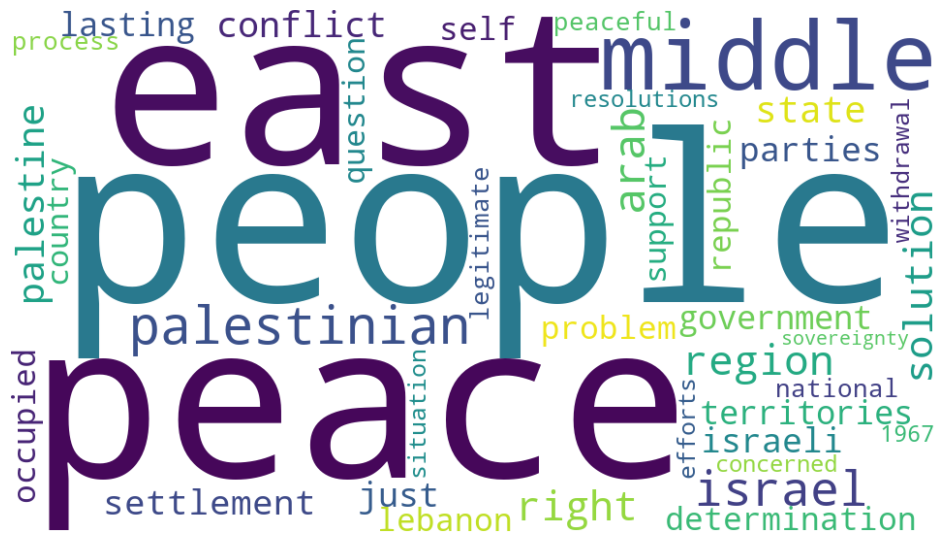

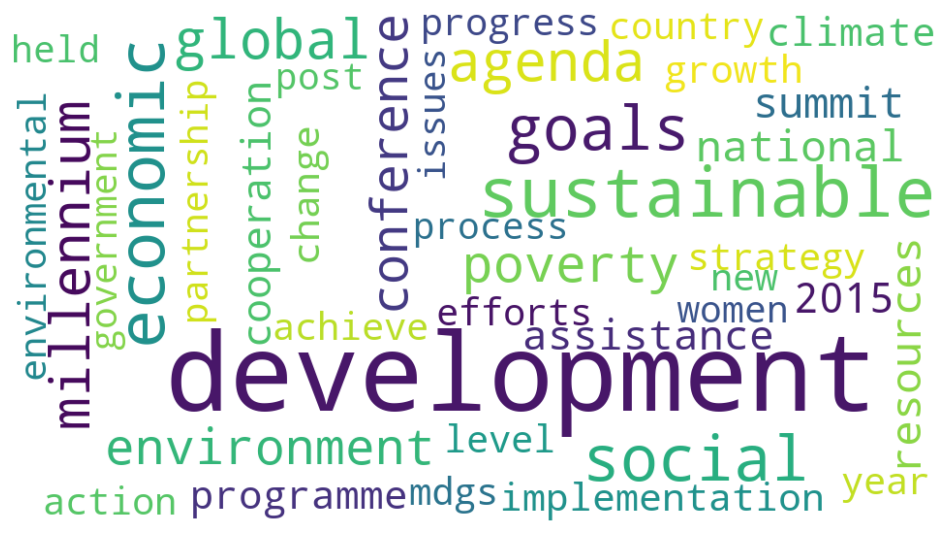

In [20]:
# Iterates over each topic in the model, retrieves the top words and their frequencies, and generates a word cloud based

wordcloud_topics(nmf_text_model, tfidf_para_vectorizer.get_feature_names_out())

## WORDCLOUD GENERATION FOR LDA PARA MODEL

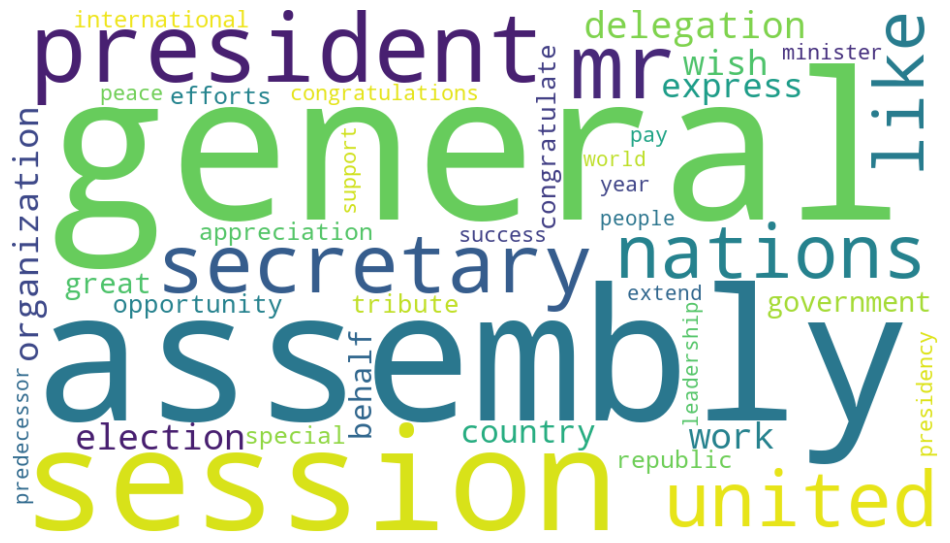

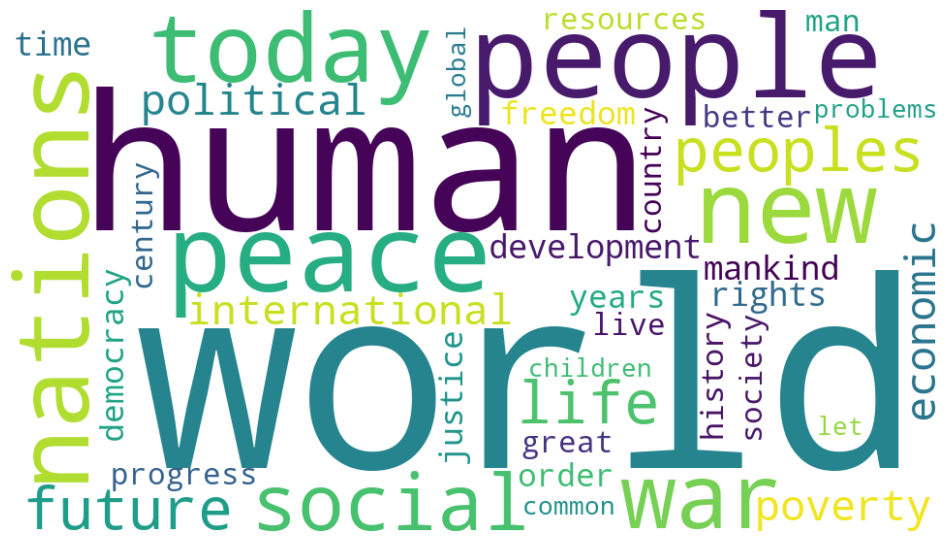

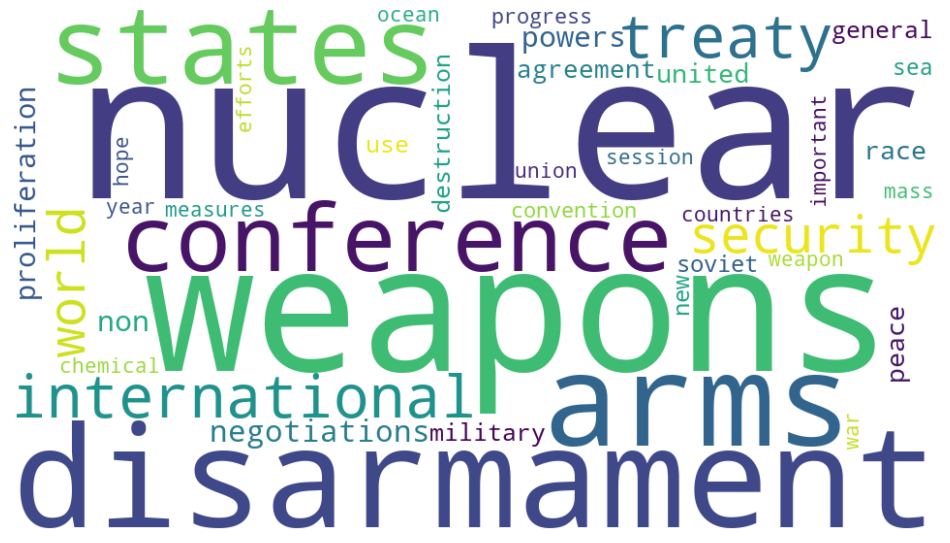

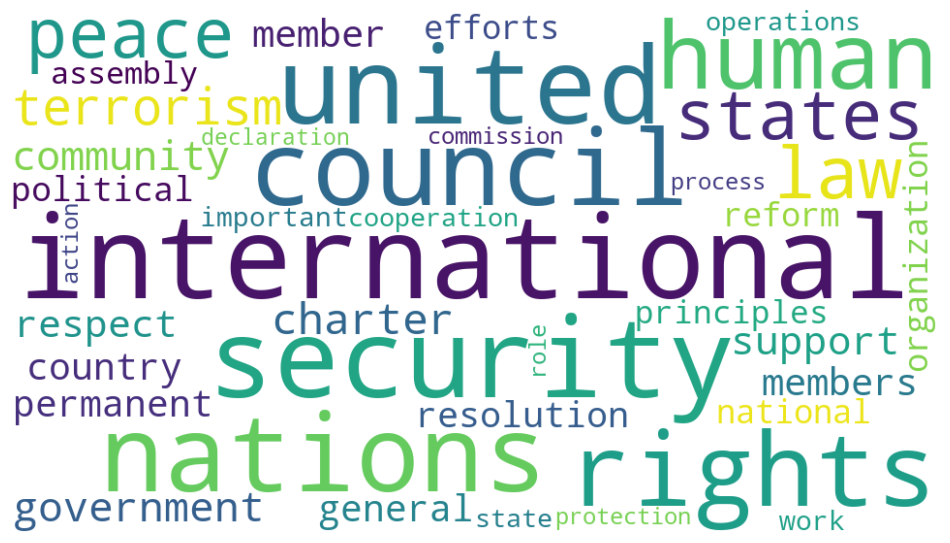

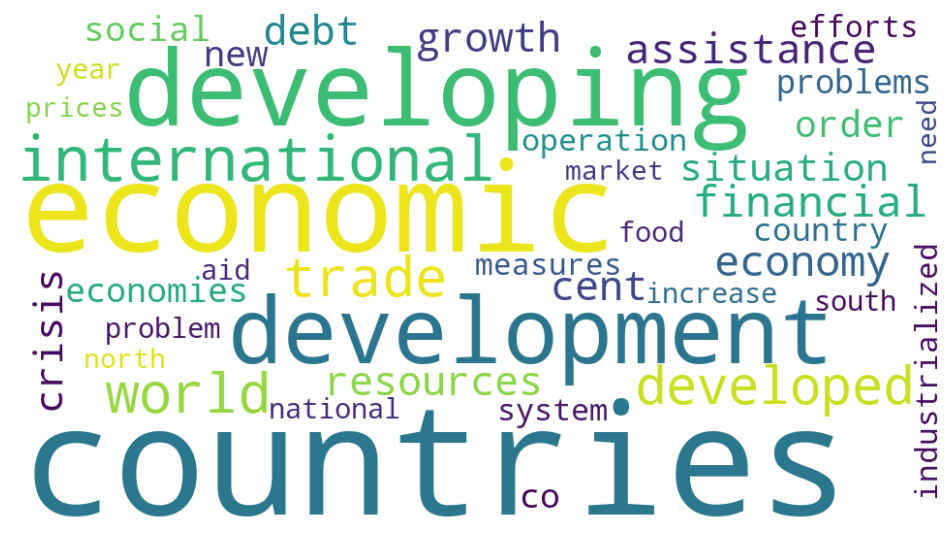

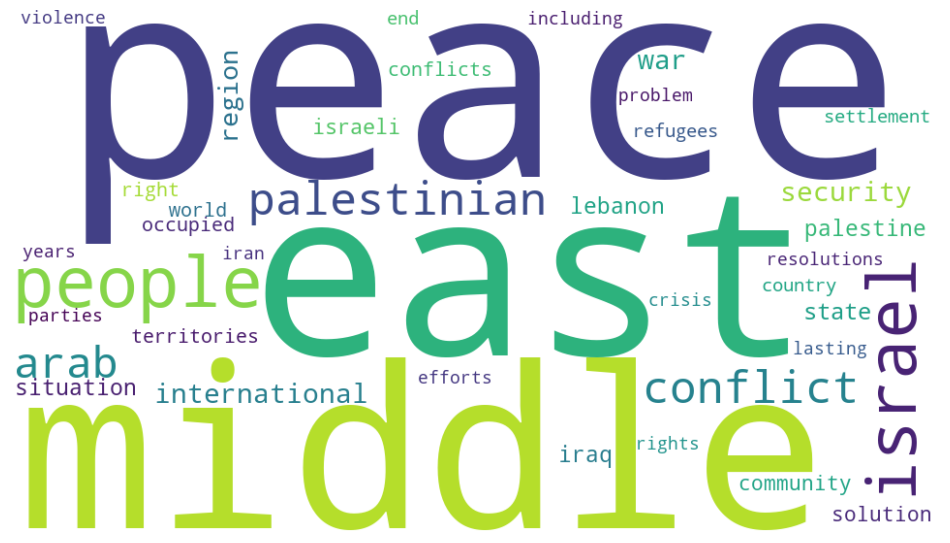

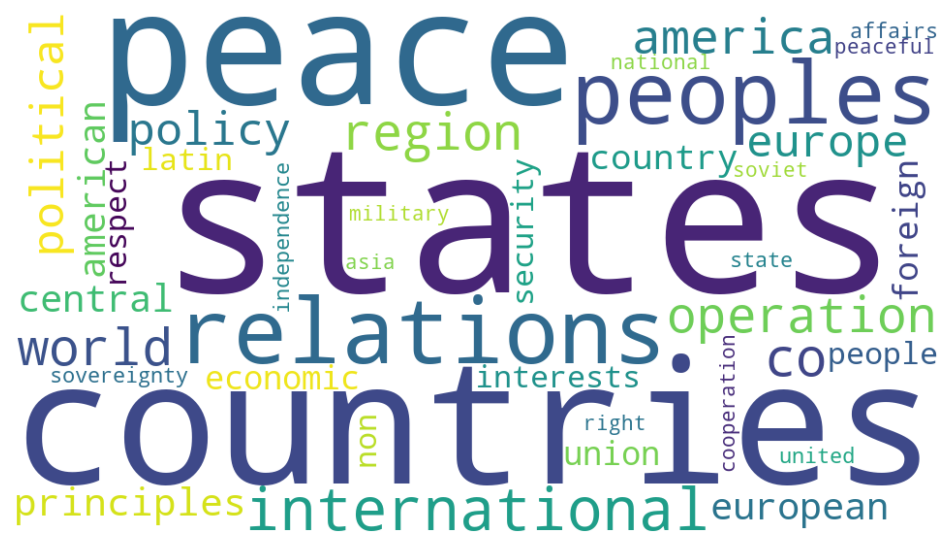

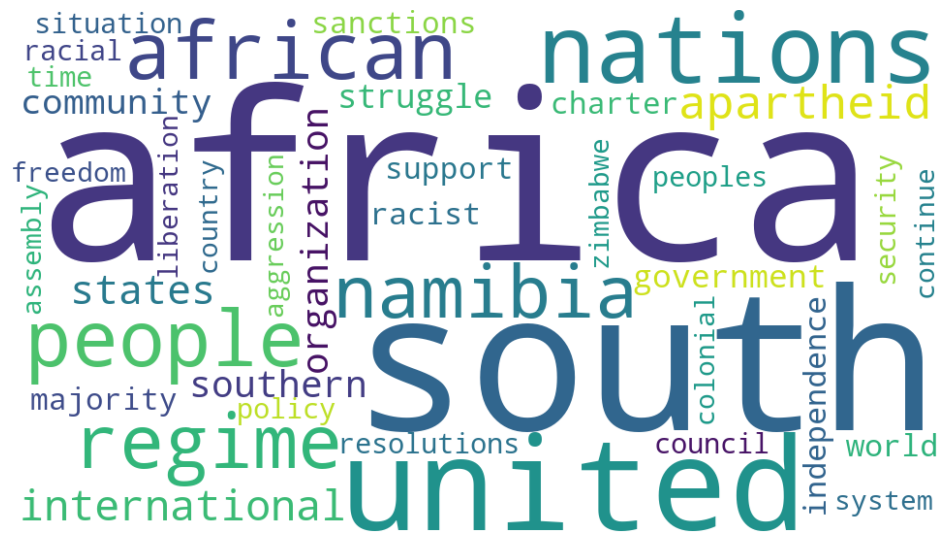

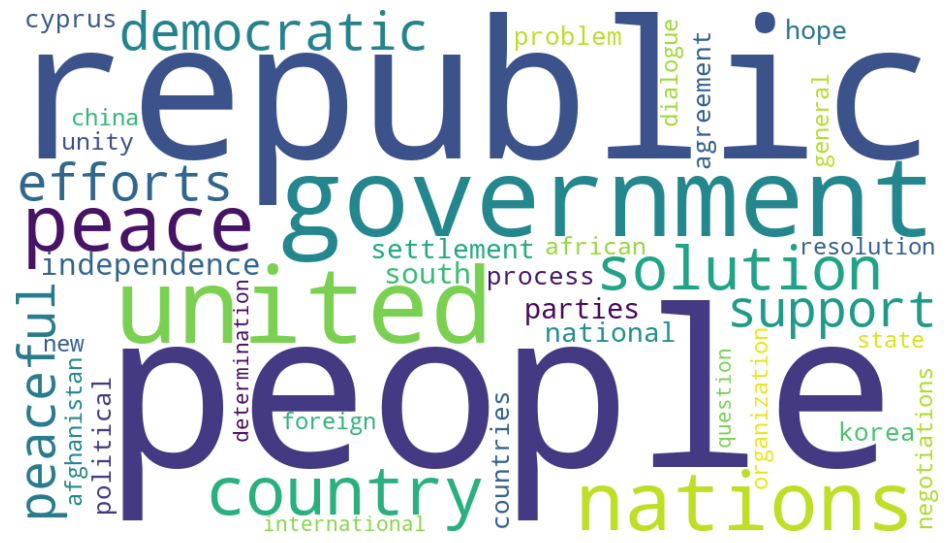

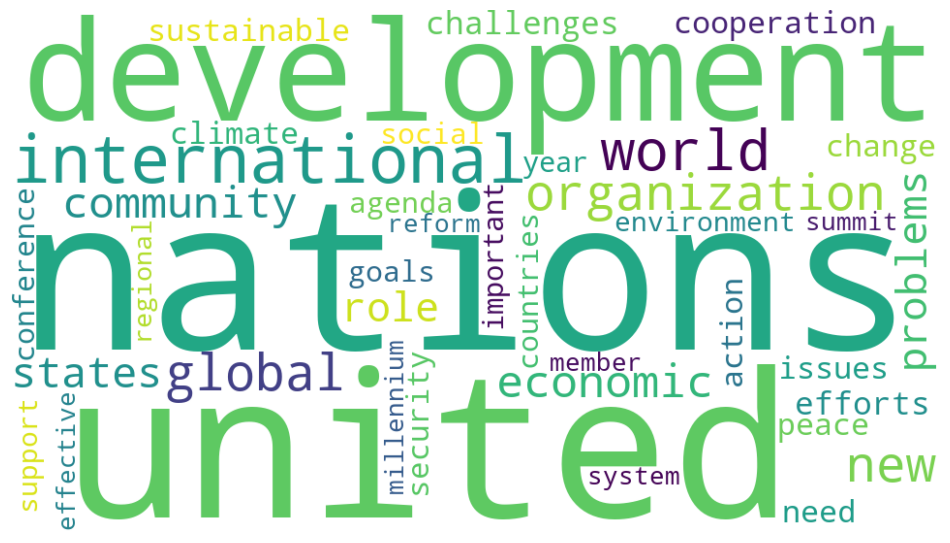

In [21]:
# Wordcloud using matplotlib.pyplot, with customization for the appearance and size.

wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

## TOPIC NAMES GENERATION

In [22]:
# Topic names for NMF Model

topic_names = []
voc = tfidf_para_vectorizer.vocabulary_
for topic in nmf_text_model.components_:
    important = topic.argsort()
    top_word = [word for word, index in voc.items() if index == important[-1]][0] + " " + [word for word, index in voc.items() if index == important[-2]][0]
    topic_names.append("Topic " + top_word)

## TOPIC NAMES GENERATION FOR NMF MODEL

In [23]:
# Generates topic names for topics in an NMF model based on their top words

from tqdm.auto import tqdm
import numpy as np
year_data = []
for year in tqdm(np.unique(np.unique(paragraph_df["year"]))):
    W_year = nmf_text_model.transform(tfidf_para_vectors[np.array(paragraph_df["year"] == year)])
    year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))

C:\Users\abhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [00:01<00:00, 32.00it/s]


## DISTRIBUTION VISUALIZATION

<Axes: xlabel='year'>

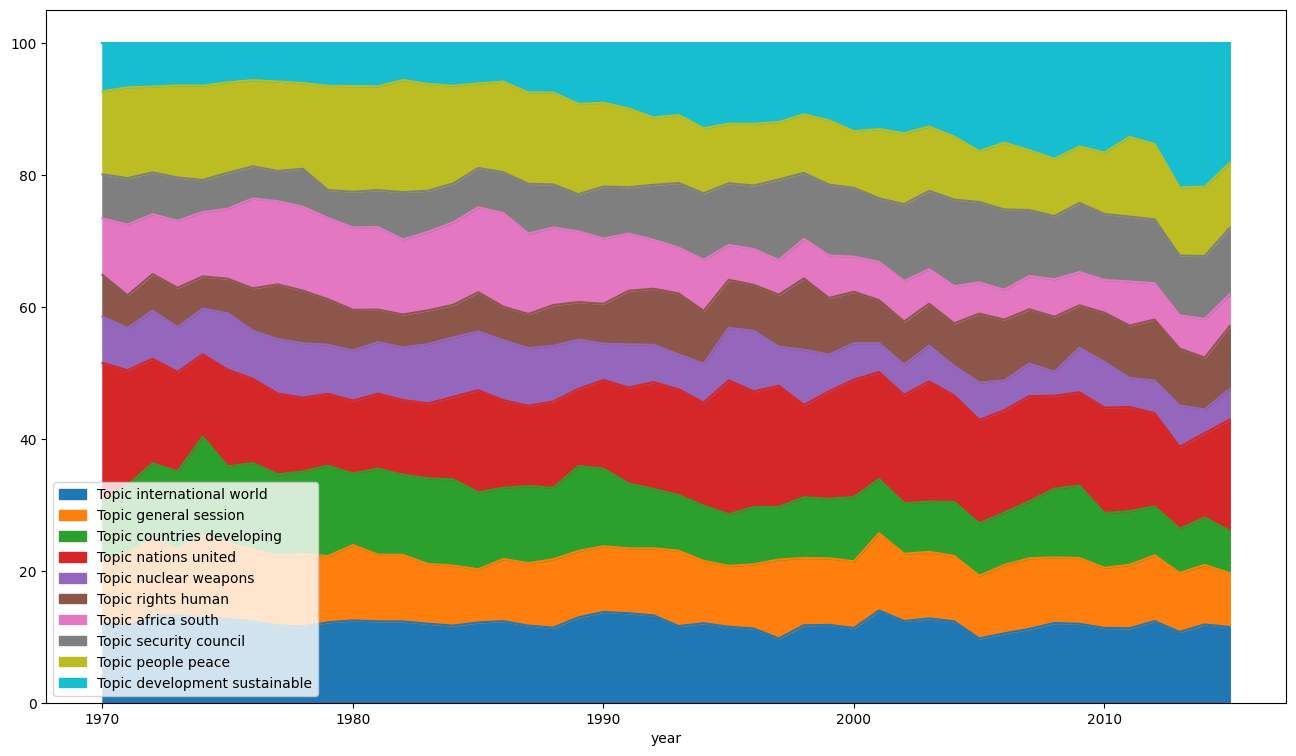

In [24]:
# Imports matplotlib.pyplot as plt and uses it to visualize the distribution

import matplotlib.pyplot as plt

# Assuming you have 10 topics in your NMF model

df_year = pd.DataFrame(year_data, columns=["year"] + topic_names).set_index("year")
df_year.plot.area(figsize=(16,9))